In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from bias.data import Dataset, DS_IXS
from bias.formal import Lambda
import bias.transforms as tf
import numpy as np
import math

In [3]:
gen_dists = {
    "x_discrete": True,
    "a_pos": 0.5,
    "g_pos": 0.5,
    "x_amt": 10
}
ds = Dataset(100000, gen_dists)

In [6]:
ds.general_stats()
print("Disp. Impact: ", ds.disparate_impact())

% Priv./Unpriv.: 0.499 / 0.501
% Pos./Neg.: 0.501 / 0.499
P(G = 1 | A = 0): 0.502
P(G = 0 | A = 0): 0.498
P(G = 1 | A = 1): 0.500
P(G = 0 | A = 1): 0.500
Disp. Impact:  0.9959838983399505


**Introducing bias with addition**<br>
Adding one copy of each (A=1, G=1) and (A=0, G=0) tuple by setting their weights to 2.

In [7]:
l_dist = Lambda(target_a = 1, target_g = 1, p_pos = 1.0) # Targeting privileged positive
reweigh_bias = tf.reweighing(ds.data, l_dist, gamma=2)
l_dist = Lambda(target_a = 0, target_g = 0, p_pos = 1.0) # Targeting unprivileged negative
reweigh_bias = tf.reweighing(reweigh_bias, l_dist, gamma=2)
reweigh_bias_ds = Dataset.from_array(reweigh_bias)

In [8]:
reweigh_bias_ds.general_stats()
print("Disp. Impact: ", reweigh_bias_ds.disparate_impact())

% Priv./Unpriv.: 0.500 / 0.500
% Pos./Neg.: 0.501 / 0.499
P(G = 1 | A = 0): 0.335
P(G = 0 | A = 0): 0.665
P(G = 1 | A = 1): 0.667
P(G = 0 | A = 1): 0.333
Disp. Impact:  1.988678075730842


In [9]:
ds.conf_matrix(reweigh_bias_ds)

TN: 49876
FN: 0
TP: 50124
FP: 0


In [10]:
add_rw = tf.Reweigher(reweigh_bias_ds)
add_rw.reweigh()
reweigh_fair_ds = Dataset.from_array(add_rw.fair_data)

In [11]:
reweigh_fair_ds.general_stats()
print("Disp. Impact: ", reweigh_fair_ds.disparate_impact())

% Priv./Unpriv.: 0.500 / 0.500
% Pos./Neg.: 0.501 / 0.499
P(G = 1 | A = 0): 0.501
P(G = 0 | A = 0): 0.499
P(G = 1 | A = 1): 0.501
P(G = 0 | A = 1): 0.499
Disp. Impact:  1.0000000000010607


**Introducing bias with modification**<br>
$P(Y|A) = P(Y=1|G=1,A)P(G=1)+ P(Y=1|G=0,A)P(G=0)$<br>
You can see $P(Y=1|G=1,A)$ as the probability that your lambda doesn't change the label and $P(Y=1|G=0,A)$ as the probability that lambda change the label.

In [12]:
ppos = 1.0 / 3.0
l_dist = Lambda(target_a = 1, target_g = 0, p_pos = ppos) # Targeting privileged negative
modify_bias = tf.modify(ds.data, l_dist)
l_dist = Lambda(target_a = 0, target_g = 1, p_pos = ppos) # Targeting unprivileged positive
modify_bias = tf.modify(modify_bias, l_dist)
modify_bias_ds = Dataset.from_array(modify_bias)

In [13]:
modify_bias_ds.general_stats()
print("Disp. Impact: ", modify_bias_ds.disparate_impact())

% Priv./Unpriv.: 0.499 / 0.501
% Pos./Neg.: 0.500 / 0.500
P(G = 1 | A = 0): 0.333
P(G = 0 | A = 0): 0.667
P(G = 1 | A = 1): 0.667
P(G = 0 | A = 1): 0.333
Disp. Impact:  2.0020827212736148


In [14]:
ds.conf_matrix(modify_bias_ds)

TN: 41526
FN: 8454
TP: 41670
FP: 8350


In [15]:
mod_rw = tf.Reweigher(modify_bias_ds)
mod_rw.reweigh()
modify_fair_ds = Dataset.from_array(mod_rw.fair_data)

In [16]:
modify_fair_ds.general_stats()
print("Disp. Impact: ", modify_fair_ds.disparate_impact())

% Priv./Unpriv.: 0.499 / 0.501
% Pos./Neg.: 0.500 / 0.500
P(G = 1 | A = 0): 0.500
P(G = 0 | A = 0): 0.500
P(G = 1 | A = 1): 0.500
P(G = 0 | A = 1): 0.500
Disp. Impact:  0.9999999999996853


**Introducing bias using removal**

In [17]:
l_dist = Lambda(target_a = 0, target_g = 1, p_pos = 0.5) # Targeting privileged positive
rem_bias = tf.deletion(ds.data, l_dist)
l_dist = Lambda(target_a = 1, target_g = 0, p_pos = 0.5) # Targeting unprivileged negative
rem_bias = tf.deletion(rem_bias, l_dist)
rem_bias_ds = Dataset.from_array(rem_bias)

In [18]:
rem_bias_ds.general_stats()
print("Disp. Impact: ", rem_bias_ds.disparate_impact())

% Priv./Unpriv.: 0.499 / 0.501
% Pos./Neg.: 0.502 / 0.498
P(G = 1 | A = 0): 0.337
P(G = 0 | A = 0): 0.663
P(G = 1 | A = 1): 0.668
P(G = 0 | A = 1): 0.332
Disp. Impact:  1.984898424858461


In [19]:
rem_rw = tf.Reweigher(rem_bias_ds)
rem_rw.reweigh()
rem_fair_ds = Dataset.from_array(rem_rw.fair_data)

In [20]:
rem_fair_ds.general_stats()
print("Disp. Impact: ", rem_fair_ds.disparate_impact())

% Priv./Unpriv.: 0.499 / 0.501
% Pos./Neg.: 0.502 / 0.498
P(G = 1 | A = 0): 0.502
P(G = 0 | A = 0): 0.498
P(G = 1 | A = 1): 0.502
P(G = 0 | A = 1): 0.498
Disp. Impact:  0.9999999999991843


**Probability of label conditional on X, A**<br>
We can achieve $P(Y | A)$ arbitrarily (using any operation, i.e. $P(Y_{add} | A) = P(Y_{mod} | A)$).<br>
However, $P(Y_{add} | X, A) \ne P(Y_{mod} | X, A)$

In [19]:
x = 4
a = 1
g = 1
p_gax = ds.P(selection=(DS_IXS.G_IX, g), conditions=[(DS_IXS.A_IX, a), (1, x)])
p_yax_add = reweigh_fair_ds.P(selection=(DS_IXS.G_IX, g), conditions=[(DS_IXS.A_IX, a), (1, x)])
p_yax_mod = modify_fair_ds.P(selection=(DS_IXS.G_IX, g), conditions=[(DS_IXS.A_IX, a), (1, x)])
p_yax_rem = rem_fair_ds.P(selection=(DS_IXS.G_IX, g), conditions=[(DS_IXS.A_IX, a), (1, x)])

In [20]:
print("Original:", p_gax)
print("Add + RW:", p_yax_add)
print("Mod + RW:", p_yax_mod)
print("Rem + RW:", p_yax_rem)

Original: 0.23732718894009217
Add + RW: 0.2395284967915569
Mod + RW: 0.3116476607893394
Rem + RW: 0.23854839531398195


### Additional experiments

In [4]:
from exp import prep_synth_datasets

In [121]:
gen_dists = {
    "x_discrete": True,
    "a_pos": 0.5,
    "g_pos": 0.5,
    "x_amt": 1
}
data = prep_synth_datasets(n=50000, gen_dists=gen_dists)

In [126]:
def P_class_ax(ds, c, a, x):
    """
        Returns P(Class = c | A = a, X = x) for the given Dataset.
    """
    cond = [((DS_IXS.A_IX, a))]
    if not isinstance(x, list):
        x = [x]
    for i in range(len(x)):
        cond.append((i+1, x[i]))
    return ds.P(selection=(DS_IXS.G_IX, c), conditions=cond)
    #return ds.P_class_ax(c, a, x)

In [127]:
def avg_diff_p_ca(data, c, a):
    """
        Returns average difference between P(G = c | A = a, X) and P(Y = c | A = a, X)
        Data is assumed to be a dict with "og" and "fair" data (see 'exp.prep_synth_datasets' for reference)
    """
    x_vals = np.unique(data["og"].data[:,1])
    diffs = {
        "add": list(),
        "mod": list(),
        "rem": list()
    }
    f_diff = lambda a, b : abs(a - b)
    for x in x_vals:
        #p_gax = data["og"].P_class_ax(c, a, x) # Precise method possible for OG data
        p_gax = P_class_ax(data["og"], c, a, x) # Old counting method
        p_yax_add = P_class_ax(data["fair"]["add"], c, a, x)
        p_yax_mod = P_class_ax(data["fair"]["mod"], c, a, x)
        p_yax_rem = P_class_ax(data["fair"]["rem"], c, a, x)
        
        diffs["add"].append(f_diff(p_gax, p_yax_add))
        diffs["mod"].append(f_diff(p_gax, p_yax_mod))
        diffs["rem"].append(f_diff(p_gax, p_yax_rem))
    
    avg = lambda l : sum(l) / len(l)
    print("Avg. differences")
    print(f" Add: {avg(diffs['add'])}")
    print(f" Mod: {avg(diffs['mod'])}")
    print(f" Rem: {avg(diffs['rem'])}")
    

In [128]:
avg_diff_p_ca(data, c=1, a=1)

Avg. differences
 Add: 0.00048427570769406356
 Mod: 0.04682955296985632
 Rem: 0.0012941642792635994


In [129]:
avg_diff_p_ca(data, c=1, a=0)

Avg. differences
 Add: 0.00011938342931479207
 Mod: 0.10472138274312759
 Rem: 0.0011311292275490758


In [130]:
avg_diff_p_ca(data, c=0, a=1)

Avg. differences
 Add: 0.00048427570769370035
 Mod: 0.04682955296985494
 Rem: 0.0012941642792634552


In [131]:
avg_diff_p_ca(data, c=0, a=0)

Avg. differences
 Add: 0.00011938342931382478
 Mod: 0.10472138274312559
 Rem: 0.001131129227549194


In [41]:
data["bias"]["mod"].P_class_ax(c=0, a=0, x=6)

0.0034173697027313757

In [132]:
data["og"].generator._x_dists

[{0: {0: 1, 1: 7}, 1: {0: 4, 1: 12}}]

In [136]:
data["bias"]["add"].general_stats()

% Priv./Unpriv.: 0.497 / 0.503
% Pos./Neg.: 0.501 / 0.499
P(G = 1 | A = 0): 0.332
P(G = 0 | A = 0): 0.668
P(G = 1 | A = 1): 0.671
P(G = 0 | A = 1): 0.329


In [96]:
# 1. Count using: P(G | X, A) = P(X, A, G) / P(X, A)  =  (X | A, G) (G) (A) / [(X, A, G=1) + (X, A, G=0)]
# 2. Use classifiers to get P(Y | X, A) (bc. counting is not so precise)
# 3. Try other (fairness) methods too
# 4. Big experiment to see where stuff breaks (diff. models & diff. methods)

ODDS(Y | X, A)  =  [P(A | Y = 0) / P(A | Y = 1)] ODDS(Y = 1 | X, A)

SyntaxError: invalid syntax (<ipython-input-96-6e7f261f638b>, line 6)

In [87]:
# P(G = 1 | A = 0, X = 4)
g, a, x = 1, 0, 4
p_actual = ds.P(selection=(DS_IXS.G_IX, g), conditions=[(DS_IXS.A_IX, a), (1, x)])
p_exp = ds.P_class_ax(g, a, x)
print("Expected:", p_exp)
print("Actual:", p_actual)#P_class_ax(ds, g, a, x))

Expected: 0.25413424347467006
Actual: 0.2625427081460169


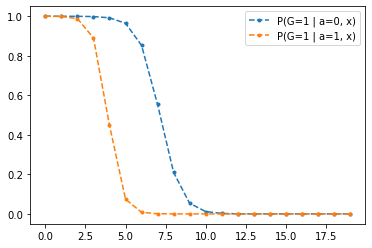

In [32]:
import matplotlib.pyplot as plt

rb = 20
p_exp_10 = [ds.P_class_ax(c=1, a=0, x=x) for x in range(0, rb)]
p_exp_11 = [ds.P_class_ax(c=1, a=1, x=x) for x in range(0, rb)]

plt.plot(list(range(0, rb)), p_exp_10, marker='.', linestyle='dashed', label='P(G=1 | a=0, x)')
plt.plot(list(range(0, rb)), p_exp_11, marker='.', linestyle='dashed', label='P(G=1 | a=1, x)')
plt.legend()
plt.show()

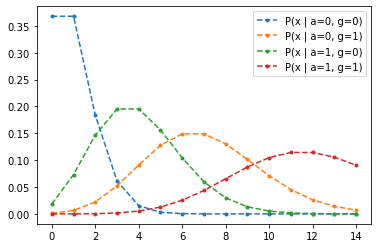

In [39]:
rb = 15
p_00 = [ds.generator.p_x_ag(x=x, a=0, g=0) for x in range(0, rb)]
p_01 = [ds.generator.p_x_ag(x=x, a=0, g=1) for x in range(0, rb)]
p_10 = [ds.generator.p_x_ag(x=x, a=1, g=0) for x in range(0, rb)]
p_11 = [ds.generator.p_x_ag(x=x, a=1, g=1) for x in range(0, rb)]

plt.plot(list(range(0, len(p_00))), p_00, marker='.', linestyle='dashed', label='P(x | a=0, g=0)')
plt.plot(list(range(0, len(p_00))), p_01, marker='.', linestyle='dashed', label='P(x | a=0, g=1)')
plt.plot(list(range(0, len(p_00))), p_10, marker='.', linestyle='dashed', label='P(x | a=1, g=0)')
plt.plot(list(range(0, len(p_00))), p_11, marker='.', linestyle='dashed', label='P(x | a=1, g=1)')
plt.legend()
plt.show()

### Classification

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [34]:
train_percent = 0.7

In [35]:
def get_classifier(model_type, ds, train_percent=0.7):
    
    # Data splits
    X_train, Y_train, W_train, X_test, Y_test = ds.train_test_split(train_percent)
    
    # Model training
    clf = model_type()
    print(f"Fitting model on {len(X_train)} samples.")
    try:
        clf.fit(X_train, Y_train, sample_weight=W_train)
    except TypeError as e:
        clf.fit(X_train, Y_train) # Model with no sample weight param
    
    # Accuracy evaluation
    pred = clf.predict(X_test)
    cfm = confusion_matrix(Y_test, pred)
    tn, fp, fn, tp = cfm.ravel()
    print(f"TN: {tn}")
    print(f"FN: {fn}")
    print(f"TP: {tp}")
    print(f"FP: {fp}")
    print(f"Accuracy: {((tn+tp)/(len(pred))):.3f}")
    
    return clf
    
    """
    # Checking relevant probabilities
    # P(G | X, A) (this is what the model learns)
    #probs = clf.predict_proba(X_test)
    # Check full range of X values
    x_vals = np.unique(data["og"].data[:,1])
    f_diff = lambda a, b : abs(a - b)
    """
    
    

In [36]:
def eval_model_proba(fair_ds, model):
    """
        Returns the Mean Absolute Error between the original data and the given model.
        = | P(G | A, X) - P(Y | A, X) |
    """
    x_vals = np.unique(fair_ds.data[:,1])
    diffs = {
        0: list(),
        1: list()
    }
    f_diff = lambda a, b : abs(a - b)
    for x in x_vals:
        for a in [0, 1]:
            p_gax = fair_ds.P_class_ax(c = 1, a=a, x=x)
            p_yax = model.predict_proba([[x, a]])[0][1] # Proba's for both classes, we only care about the positive G = 1

            diffs[a].append(f_diff(p_gax, p_yax))
    
    avg = lambda l : sum(l) / len(l)
    mae_0 = avg(diffs[0])
    mae_1 = avg(diffs[1])
    print("P(Class = 1 | A = 0, X) MAE:", mae_0)
    print("P(Class = 1 | A = 1, X) MAE:", mae_1)
    return mae_0, mae_1

In [37]:
from exp import prep_synth_datasets

In [38]:
gen_dists = {
    "x_discrete": True,
    "a_pos": 0.5,
    "g_pos": 0.5,
    "x_amt": 10
}
data = prep_synth_datasets(n=30000)

In [39]:
model_types = [GaussianNB, DecisionTreeClassifier, KNeighborsClassifier]
add_models = [get_classifier(m_type, data['fair']['add']) for m_type in model_types]
mod_models = [get_classifier(m_type, data['fair']['mod']) for m_type in model_types]
rem_models = [get_classifier(m_type, data['fair']['rem']) for m_type in model_types]

Fitting model on 21000 samples.
TN: 4002
FN: 727
TP: 3776
FP: 495
Accuracy: 0.864
Fitting model on 21000 samples.
TN: 4329
FN: 358
TP: 4145
FP: 168
Accuracy: 0.942
Fitting model on 21000 samples.
TN: 4329
FN: 358
TP: 4145
FP: 168
Accuracy: 0.942
Fitting model on 21000 samples.
TN: 3915
FN: 1458
TP: 3059
FP: 568
Accuracy: 0.775
Fitting model on 21000 samples.
TN: 3679
FN: 1008
TP: 3509
FP: 804
Accuracy: 0.799
Fitting model on 21000 samples.
TN: 3521
FN: 911
TP: 3606
FP: 962
Accuracy: 0.792
Fitting model on 15782 samples.
TN: 3140
FN: 385
TP: 2995
FP: 245
Accuracy: 0.907
Fitting model on 15782 samples.
TN: 3281
FN: 263
TP: 3117
FP: 104
Accuracy: 0.946
Fitting model on 15782 samples.
TN: 3247
FN: 313
TP: 3067
FP: 138
Accuracy: 0.933


In [40]:
print("MAE - Addition + Reweigh")
for m in add_models:
    print(m)
    eval_model_proba(data['og'], m)

MAE - Addition + Reweigh
GaussianNB()
P(Class = 1 | A = 0, X) MAE: 0.09326270704986632
P(Class = 1 | A = 1, X) MAE: 0.0762022954995257
DecisionTreeClassifier()
P(Class = 1 | A = 0, X) MAE: 0.0009677297533683191
P(Class = 1 | A = 1, X) MAE: 0.0024950791028706806
KNeighborsClassifier()
P(Class = 1 | A = 0, X) MAE: 0.018112657694113028
P(Class = 1 | A = 1, X) MAE: 0.021957339053952894


In [41]:
print("MAE - Modification + Reweigh")
for m in mod_models:
    print(m)
    eval_model_proba(data['og'], m)

MAE - Modification + Reweigh
GaussianNB()
P(Class = 1 | A = 0, X) MAE: 0.11956372675054826
P(Class = 1 | A = 1, X) MAE: 0.0689479682950653
DecisionTreeClassifier()
P(Class = 1 | A = 0, X) MAE: 0.10138008169302265
P(Class = 1 | A = 1, X) MAE: 0.055883914663465914
KNeighborsClassifier()
P(Class = 1 | A = 0, X) MAE: 0.17754116653994642
P(Class = 1 | A = 1, X) MAE: 0.07104130358271667


In [42]:
print("MAE - Removal + Reweigh")
for m in rem_models:
    print(m)
    eval_model_proba(data['og'], m)

MAE - Removal + Reweigh
GaussianNB()
P(Class = 1 | A = 0, X) MAE: 0.09456142201298566
P(Class = 1 | A = 1, X) MAE: 0.07460453039408646
DecisionTreeClassifier()
P(Class = 1 | A = 0, X) MAE: 0.0021731056649909528
P(Class = 1 | A = 1, X) MAE: 0.00324616723064516
KNeighborsClassifier()
P(Class = 1 | A = 0, X) MAE: 0.03938643080381627
P(Class = 1 | A = 1, X) MAE: 0.04953121723548028
